# Environment

In [1]:
import pandas as pd
import yaml
import os
import sys
import importlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load config
CONFIG_PATH = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/code7_cpg_enrichment/config.yaml"

# Specify which configuration to use (1-based index)
# Change this to select different configurations
CONFIG_NUMBER = 8

with open(CONFIG_PATH, 'r') as f:
    # Load all documents from the YAML file
    configs = list(yaml.safe_load_all(f))

# Select the specific configuration (subtract 1 because list is 0-based)
config = configs[CONFIG_NUMBER - 1]

# Get values from the selected config
BASE_DIR = config['base_dir']
RUN_NAME = config['run_name']
CELL_TYPE = config['cell_type']
ALIGNMENT_TYPE = config['alignment_type']
PEAKS_TYPE = config['peaks_type']

ENRICHMENT_FILE = f"{BASE_DIR}/results/{ALIGNMENT_TYPE}/cpg_enrichment/{CELL_TYPE}/{PEAKS_TYPE}/{RUN_NAME}/cpg_enrichment_parallel.csv"
print(ENRICHMENT_FILE)

OUTPUT_LISTS_PATH = f"{BASE_DIR}/results/{ALIGNMENT_TYPE}/cpg_enrichment/{CELL_TYPE}/{PEAKS_TYPE}/{RUN_NAME}/lists"
print(OUTPUT_LISTS_PATH)
os.makedirs(OUTPUT_LISTS_PATH, exist_ok=True)

# Set pandas display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap wide DataFrames
pd.set_option('display.max_colwidth', None) # Don't truncate column contents

sys.path.append("/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/code7_cpg_enrichment")
try:
    import functions
    importlib.reload(functions)
    from functions import *
except ModuleNotFoundError:
    print("Warning: Could not import functions module. Make sure functions.py exists in the code7_cpg_enrichment directory.")


/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/results/no_dedup/cpg_enrichment/Neu/broad/cpg_enrichment_2_rep_in_peaks/cpg_enrichment_parallel.csv
/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/results/no_dedup/cpg_enrichment/Neu/broad/cpg_enrichment_2_rep_in_peaks/lists


# Load Data

In [2]:
# Load the CpG enrichment results
cpg_enrichment_df = pd.read_csv(ENRICHMENT_FILE)

In [3]:
# Display first few rows and basic info
print("DataFrame shape:", cpg_enrichment_df.shape)
print("\nFirst few rows:")
display(cpg_enrichment_df.head())
print("\nColumn names:")
print(cpg_enrichment_df.columns.tolist())

DataFrame shape: (13996, 24)

First few rows:


,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,exo_replicate_signals,endo_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,exo_replicates_with_peaks,endo_replicates_with_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,region_start,region_end
0,chr1,3670619,3671074,48.553010,36.378130,1.334676,1.0,both,exo_only,False,3,2,"40.693594765158494,46.949046249665365,58.01638882370665","4.222461801862742,68.53379841865063",1937,455,CpG:,613,3,1,6.08946;8.05807;5.49517,12.1862,3670618,3672555
1,chr1,3671654,3672156,48.553010,36.378130,1.334676,1.0,both,both,False,3,2,"40.693594765158494,46.949046249665365,58.01638882370665","4.222461801862742,68.53379841865063",1937,502,CpG:,613,3,2,6.08946;8.05807;5.49517,14.2013;12.1862,3670618,3672555
2,chr1,4571641,4572075,20.994651,18.831086,1.114893,1.0,both,exo_only,False,3,2,"26.031328827189064,14.683576227902995,22.26904846832133","2.590484450059953,35.07168820338153",643,434,CpG:,619,3,1,3.91321;3.39512;3.76449,4.05345,4571501,4572144
3,chr1,4785376,4785814,53.115879,72.630742,0.731314,0.2,both,both,False,3,2,"57.13384269290883,55.76285252373141,46.45094047384572","73.3326088994849,71.92887539467657",2216,438,CpG:,621,3,2,11.1372;19.5773;9.32821,23.228;16.7278,4784076,4786292
4,chr1,4807559,4808103,25.618991,37.664475,0.680190,0.4,both,both,False,3,2,"28.228248375731628,12.560640977196192,36.06808397312357","44.280206400113016,31.048742879451954",3465,544,CpG:,621,3,2,5.73973;10.656;7.12485,8.19533;7.28905,4805683,4809148



Column names:
['chr', 'start', 'end', 'exo_signal', 'endo_signal', 'enrichment', 'pvalue', 'binding_type', 'binding_type_by_peaks', 'significant', 'exo_replicates_with_signal', 'endo_replicates_with_signal', 'exo_replicate_signals', 'endo_replicate_signals', 'region_length', 'cpg_length', 'cpg_score', 'cpg_name', 'exo_replicates_with_peaks', 'endo_replicates_with_peaks', 'exo_peak_scores_by_rep', 'endo_peak_scores_by_rep', 'region_start', 'region_end']


**Columns explanation:**

1. Signal vs Peaks columns:

- `endo_replicates_with_signal`: Counts how many replicates have a non-zero signal value when measuring the bigWig signal in the region.
- `endo_replicates_with_peaks`: Counts how many replicates have an overlapping peak in the broadPeak files.

So, e.g. it's possible to have `endo_replicates_with_peaks=0` but `endo_replicates_with_signal=2` because:
- Peaks represent regions that passed the peak caller's statistical threshold for significance
- Signal values represent the raw enrichment data before any statistical filtering
- So you can have detectable signal in a region that wasn't strong/consistent enough to be called as a peak

2. Scores vs Signals:

- `endo_peak_scores_by_rep`: Contains the `signalValue` scores from the broadPeak files for each replicate that has a peak overlapping the region. These scores are peak caller-specific enrichment metrics.
- `endo_replicate_signals`: Contains the actual signal values extracted from the bigWig files for each replicate in that region. These are the raw signal values.

`endo_peak_scores_by_rep` is NaN when there are no peaks overlapping the region in any replicate (`endo_replicates_with_peaks=0`). 

**Handling multiple replicates:**

1. For Signals (from bigWig files):
- Each replicate's signal is obtained independently using `get_signal_from_bigwig()`
- The signals are stored as individual values in `endo_replicate_signals` as a comma-separated string
- The final `endo_signal` used for enrichment calculations is the **mean across all replicates**

2. For Peak Scores:
- Peak scores are stored in `endo_peak_scores_by_rep` using a specific format:
  - Scores from different peaks within the same replicate are **comma-separated**
  - Different replicates are **semicolon-separated**
  - If a replicate has no peaks, it's simply not included in the string
- **There's no averaging of peak scores**

For example:
- If replicate 1 has two peaks with scores 5.0 and 6.0, and replicate 2 has one peak with score 4.0, while replicate 3 has no peaks:
  - `endo_peak_scores_by_rep` would be: `"5.0, 6.0; 4.0"`
  - `endo_replicates_with_peaks` would be `2`
  - If all replicates had signals of `2.0`, `3.0`, and `1.0`:
    - `endo_replicate_signals` would be `"2.0, 3.0, 1.0"`
    - `endo_signal` would be `2.0` (the mean)
    - `endo_replicates_with_signal` would be `3`

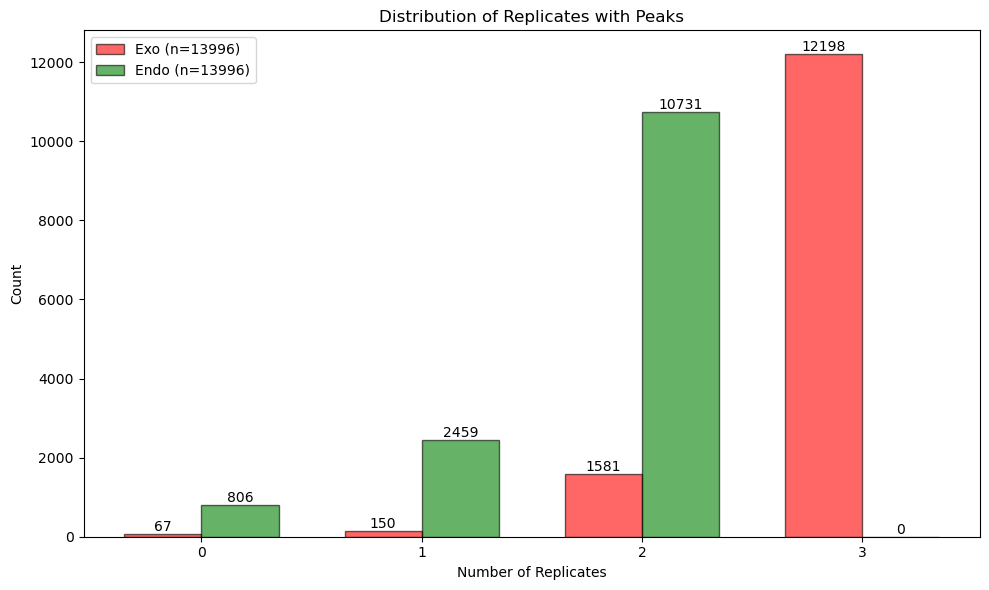

In [4]:
# Create single plot
plt.figure(figsize=(10, 6))

# Get data for plotting
x = np.arange(4)  # 0 through 3 replicates
exo_counts = [len(cpg_enrichment_df[cpg_enrichment_df['exo_replicates_with_peaks'] == i]) for i in range(4)]
endo_counts = [len(cpg_enrichment_df[cpg_enrichment_df['endo_replicates_with_peaks'] == i]) for i in range(4)]

# Plot bars side by side
width = 0.35
plt.bar(x - width/2, exo_counts, width, label=f'Exo (n={sum(exo_counts)})', color='red', alpha=0.6, edgecolor='black')
plt.bar(x + width/2, endo_counts, width, label=f'Endo (n={sum(endo_counts)})', color='green', alpha=0.6, edgecolor='black')

# Add value labels on top of each bar
for i in range(len(x)):
    plt.text(x[i] - width/2, exo_counts[i], str(exo_counts[i]), 
             ha='center', va='bottom')
    plt.text(x[i] + width/2, endo_counts[i], str(endo_counts[i]),
             ha='center', va='bottom')

plt.title('Distribution of Replicates with Peaks')
plt.xlabel('Number of Replicates')
plt.ylabel('Count')
plt.xticks(x)
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
# Sort the DataFrame by enrichment value in descending order
cpg_enrichment_df_sorted = cpg_enrichment_df.sort_values(by='enrichment', ascending=False)

# Split data based on binding type

## By signal value

Non zero signal in minumum 2 replicates

In [6]:
# Split data based on binding type
exo_only_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'exo_only']
endo_only_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'endo_only'] 
both_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by exo only: {len(exo_only_df_by_signal)}")
print(f"Number of CpG islands bound by endo only: {len(endo_only_df_by_signal)}")
print(f"Number of CpG islands bound by both: {len(both_df_by_signal)}")


Number of CpG islands bound by exo only: 671
Number of CpG islands bound by endo only: 5
Number of CpG islands bound by both: 13320


## By peaks number

Minimum 2 replicates with peaks

In [7]:
# Split data based on binding type
exo_only_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'exo_only']
endo_only_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'endo_only'] 
both_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by exo only: {len(exo_only_df_by_peaks)}")
print(f"Number of CpG islands bound by endo only: {len(endo_only_df_by_peaks)}")
print(f"Number of CpG islands bound by both: {len(both_df_by_peaks)}")


Number of CpG islands bound by exo only: 3265
Number of CpG islands bound by endo only: 217
Number of CpG islands bound by both: 10514


# Data analysis

## Both: enrichment distribution

In [8]:
print("Summary statistics of enrichment values selected by signal:")
print(both_df_by_signal['enrichment'].describe())

print("\nSummary statistics of enrichment values selected by peaks:")
print(both_df_by_peaks['enrichment'].describe())

Summary statistics of enrichment values selected by signal:
count    13320.000000
mean         1.256139
std          1.254275
min          0.074059
25%          0.847385
50%          1.095021
75%          1.433160
max         69.837614
Name: enrichment, dtype: float64

Summary statistics of enrichment values selected by peaks:
count    10514.000000
mean         1.141411
std          0.462720
min          0.182028
25%          0.833388
50%          1.062395
75%          1.362137
max          5.112596
Name: enrichment, dtype: float64


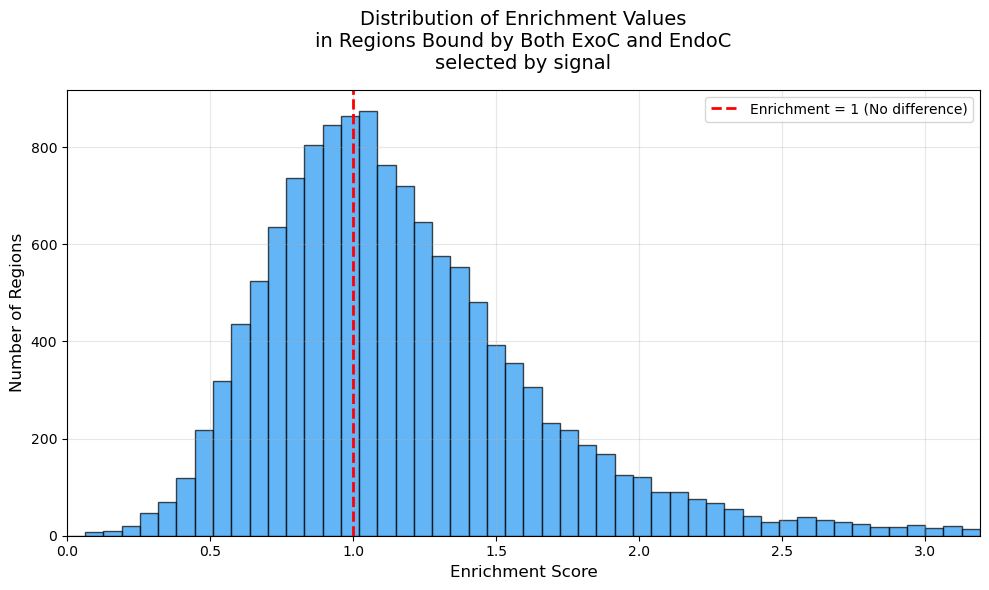

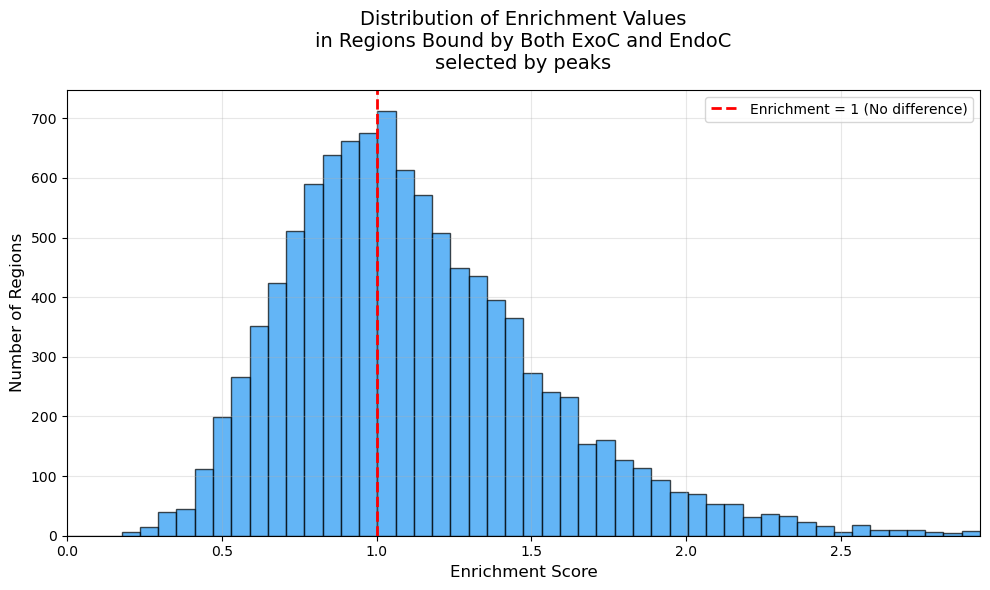

In [9]:
range_min_signal, range_max_signal = plot_enrichment_distribution(both_df_by_signal, title="selected by signal")
range_min_peaks, range_max_peaks = plot_enrichment_distribution(both_df_by_peaks, title="selected by peaks")


## Both: enrichment outliers

In [10]:
outliers_df_signal = both_df_by_signal[both_df_by_signal['enrichment'] > range_max_signal].copy()
print(f"\nNumber of outliers selected by signal(enrichment > {range_max_signal}):", len(outliers_df_signal))

outliers_df_peaks = both_df_by_peaks[both_df_by_peaks['enrichment'] > range_max_peaks].copy()
print(f"\nNumber of outliers selected by peaks(enrichment > {range_max_peaks}):", len(outliers_df_peaks))


Number of outliers selected by signal(enrichment > 3.190482654426864): 243

Number of outliers selected by peaks(enrichment > 2.9483816141389756): 73


In [11]:
outliers_df_signal.head()

,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,exo_replicate_signals,endo_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,exo_replicates_with_peaks,endo_replicates_with_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,region_start,region_end
6803,chr2,23234413,23234668,16.794623,0.240481,69.837614,0.2,both,exo_only,False,3,2,"7.058976042859908,6.9968847448834905,36.328007959141026","0.46814896761237895,0.012813137511336758",1052,255,CpG:,762,2,0,2.87304;5.07003,NaN,23234494,23235546
13899,chrX,134474995,134476624,14.652568,0.220476,66.458905,0.2,both,exo_only,False,3,2,"4.9560373693361175,10.820322062386136,28.181344670919696","0.22521146586243534,0.21573976731636155",1562,1629,CpG:,1610,2,1,3.8588;7.21709,7.66312,134474706,134476268
13569,chr9,118478480,118479486,23.343299,0.550553,42.399705,0.2,both,exo_only,False,3,2,"33.93851310603746,17.911137278255072,18.180246403297293","0.8770602892878265,0.2240463850828916",1103,1006,CpG:,1488,2,0,3.58115;4.64212,NaN,118479175,118480278
4084,chr14,79773910,79774336,56.027859,1.499291,37.369569,0.2,both,exo_only,False,3,2,"41.951435701959085,48.65400242592131,77.47813891511102","1.0309465859560358,1.967635476882559",894,426,CpG:,1193,3,0,4.39323;9.11596;5.54912,NaN,79773517,79774411
5631,chr17,48096832,48097131,35.014249,1.227453,28.525936,0.2,both,exo_only,False,3,2,"38.01268870973587,38.447963805675506,28.582095211982725","0.07915065050125122,2.3757555694580077",2000,299,CpG:,951,3,0,4.73583;5.63338;6.41219,NaN,48095179,48097179


In [12]:
print_outlier_groups(outliers_df_signal, "signal")


First 5 outliers selected by signal:
chr2:23,234,413-23,234,668                        enrichment: 69.83761396881002
chrX:134,474,995-134,476,624                      enrichment: 66.45890489333391
chr9:118,478,480-118,479,486                      enrichment: 42.39970471986702
chr14:79,773,910-79,774,336                       enrichment: 37.36956857621695
chr17:48,096,832-48,097,131                       enrichment: 28.525936312993487

Middle 5 outliers selected by signal:
chr4:115,962,809-115,963,384                      enrichment: 4.188481759119382
chr9:111,689,987-111,690,485                      enrichment: 4.17207177314485
chr2:163,472,210-163,472,708                      enrichment: 4.170204300336368
chr6:134,869,872-134,870,187                      enrichment: 4.165203150982153
chr12:107,915,284-107,917,294                     enrichment: 4.155270455733433

Last 5 outliers selected by signal:
chr4:132,638,827-132,639,348                      enrichment: 3.2198900485400834
chr4:

In [13]:
n_rows = len(outliers_df_signal)

print("\nFirst 5 outliers selected by signal:")
for _, row in outliers_df_signal[:5].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")

if n_rows > 10:
    mid_start = n_rows//2 - 2
    print("\nMiddle 5 outliers selected by signal:")
    for _, row in outliers_df_signal[mid_start:mid_start+5].iterrows():
        print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")

print("\nLast 5 outliers selected by signal:")
for _, row in outliers_df_signal[-5:].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")


First 5 outliers selected by signal:
chr2:23,234,413-23,234,668                        enrichment: 69.83761396881002
chrX:134,474,995-134,476,624                      enrichment: 66.45890489333391
chr9:118,478,480-118,479,486                      enrichment: 42.39970471986702
chr14:79,773,910-79,774,336                       enrichment: 37.36956857621695
chr17:48,096,832-48,097,131                       enrichment: 28.525936312993487

Middle 5 outliers selected by signal:
chr4:115,962,809-115,963,384                      enrichment: 4.188481759119382
chr9:111,689,987-111,690,485                      enrichment: 4.17207177314485
chr2:163,472,210-163,472,708                      enrichment: 4.170204300336368
chr6:134,869,872-134,870,187                      enrichment: 4.165203150982153
chr12:107,915,284-107,917,294                     enrichment: 4.155270455733433

Last 5 outliers selected by signal:
chr4:132,638,827-132,639,348                      enrichment: 3.2198900485400834
chr4:

In [14]:
print_outlier_groups(outliers_df_peaks, "peaks")


First 5 outliers selected by peaks:
chr15:98,762,433-98,763,412                       enrichment: 5.112595522534346
chrX:170,676,257-170,677,937                      enrichment: 4.934107322032432
chr4:123,201,322-123,201,625                      enrichment: 4.855980847921074
chr7:79,715,429-79,715,900                        enrichment: 4.793502437895492
chr1:172,376,350-172,377,347                      enrichment: 4.662826950315053

Middle 5 outliers selected by peaks:
chr10:80,475,224-80,475,700                       enrichment: 3.307060157509202
chr15:76,178,573-76,181,907                       enrichment: 3.300728883140832
chr10:117,792,294-117,793,054                     enrichment: 3.248958836166627
chr4:132,638,827-132,639,348                      enrichment: 3.2198900485400834
chr1:91,800,886-91,802,681                        enrichment: 3.196232834410337

Last 5 outliers selected by peaks:
chrX:102,070,951-102,071,451                      enrichment: 2.9740023571419747
chr12:1

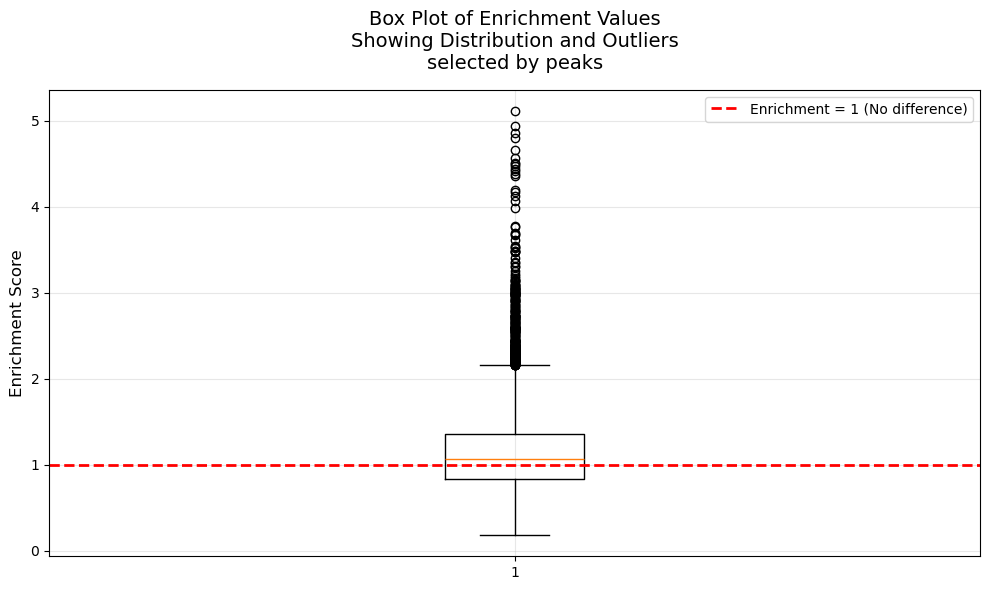

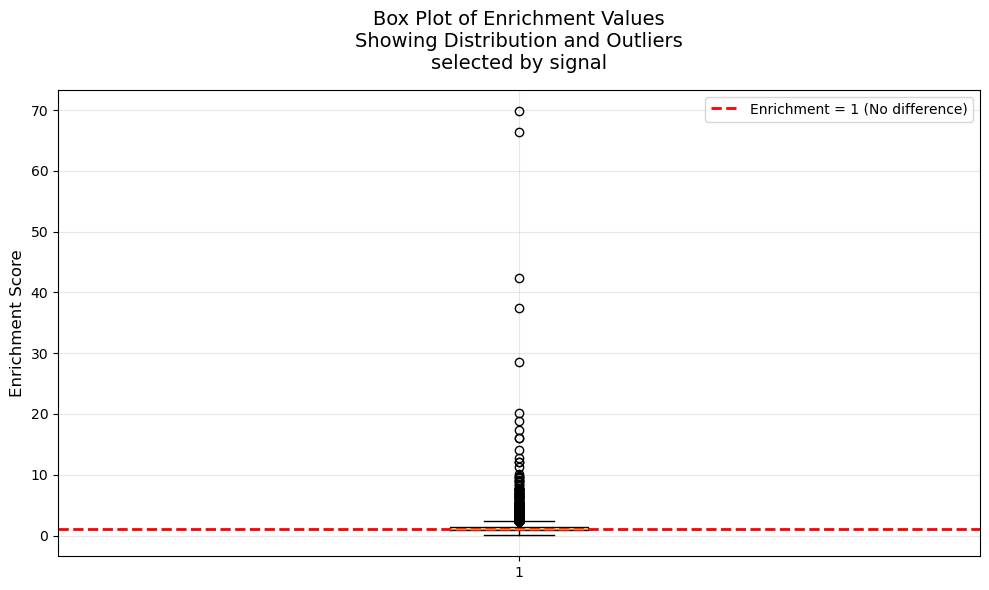

In [15]:
plot_enrichment_boxplot(both_df_by_peaks, title="selected by peaks")
plot_enrichment_boxplot(both_df_by_signal, title="selected by signal")

In [16]:
outliers_df_signal["endo_replicates_with_peaks"].value_counts()

signal_endo_zero_peaks  = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 0]
signal_endo_one_peaks   = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 1]
signal_endo_two_peaks   = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 2]
signal_endo_three_peaks = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 3]

outliers_df_peaks["endo_replicates_with_peaks"].value_counts()

peaks_endo_zero_peaks  = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 0]
peaks_endo_one_peaks   = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 1]
peaks_endo_two_peaks   = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 2]
peaks_endo_three_peaks = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 3]

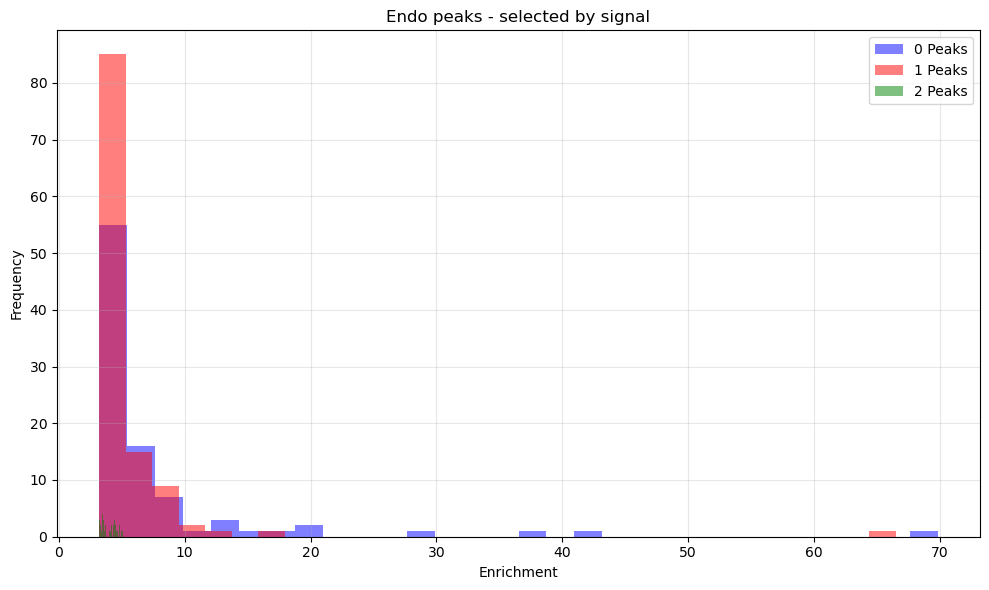

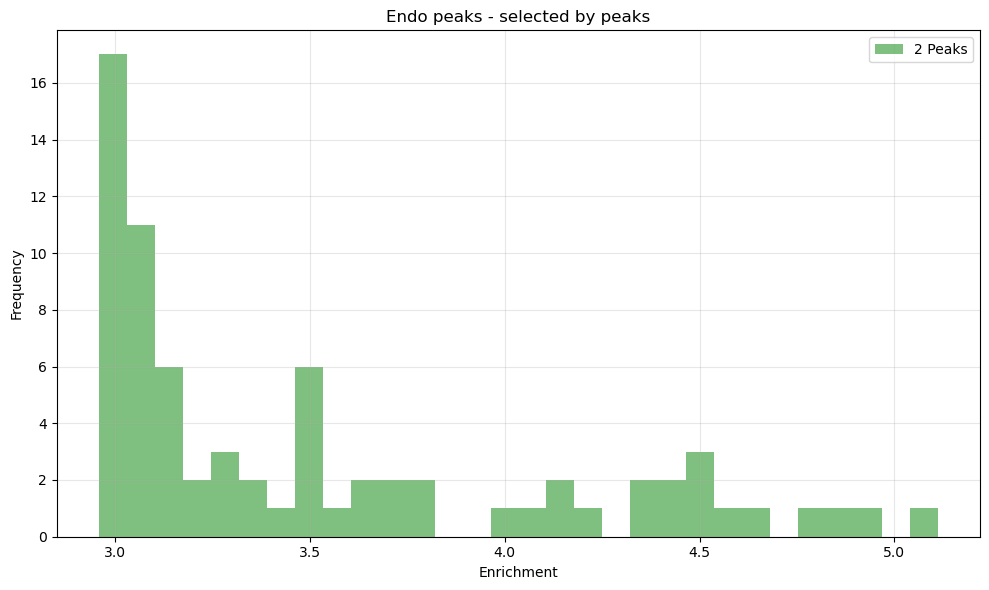

In [17]:
# Classify and plot for signal and peaks outliers
peaks_zero_peaks_signal, peaks_one_peaks_signal, peaks_two_peaks_signal, peaks_three_peaks_signal = plot_by_peaks(outliers_df_signal, peaks_column='endo_replicates_with_peaks', title="Endo peaks - selected by signal")
peaks_zero_peaks_peaks, peaks_one_peaks_peaks, peaks_two_peaks_peaks, peaks_three_peaks_peaks = plot_by_peaks(outliers_df_peaks, peaks_column='endo_replicates_with_peaks', title="Endo peaks - selected by peaks")

In [18]:
print_outlier_groups(peaks_two_peaks_peaks, "peaks")


First 5 outliers selected by peaks:
chr15:98,762,433-98,763,412                       enrichment: 5.112595522534346
chrX:170,676,257-170,677,937                      enrichment: 4.934107322032432
chr4:123,201,322-123,201,625                      enrichment: 4.855980847921074
chr7:79,715,429-79,715,900                        enrichment: 4.793502437895492
chr1:172,376,350-172,377,347                      enrichment: 4.662826950315053

Middle 5 outliers selected by peaks:
chr10:80,475,224-80,475,700                       enrichment: 3.307060157509202
chr15:76,178,573-76,181,907                       enrichment: 3.300728883140832
chr10:117,792,294-117,793,054                     enrichment: 3.248958836166627
chr4:132,638,827-132,639,348                      enrichment: 3.2198900485400834
chr1:91,800,886-91,802,681                        enrichment: 3.196232834410337

Last 5 outliers selected by peaks:
chrX:102,070,951-102,071,451                      enrichment: 2.9740023571419747
chr12:1

In [19]:
print_outlier_groups(peaks_two_peaks_signal, "signal")


First 5 outliers selected by signal:
chr15:98,762,433-98,763,412                       enrichment: 5.112595522534346
chrX:170,676,257-170,677,937                      enrichment: 4.934107322032432
chr4:123,201,322-123,201,625                      enrichment: 4.855980847921074
chr7:79,715,429-79,715,900                        enrichment: 4.793502437895492
chr1:172,376,350-172,377,347                      enrichment: 4.662826950315053

Middle 5 outliers selected by signal:
chr10:11,149,205-11,149,869                       enrichment: 3.982454248139226
chr11:80,209,067-80,209,554                       enrichment: 3.7702316591200886
chr4:131,836,379-131,838,503                      enrichment: 3.759402513712775
chr19:6,401,468-6,401,689                         enrichment: 3.698137280919565
chr2:11,602,879-11,603,307                        enrichment: 3.6850659191105457

Last 5 outliers selected by signal:
chr10:80,475,224-80,475,700                       enrichment: 3.307060157509202
chr1

## IGV: examples

chr2:50,066,300-50,067,004

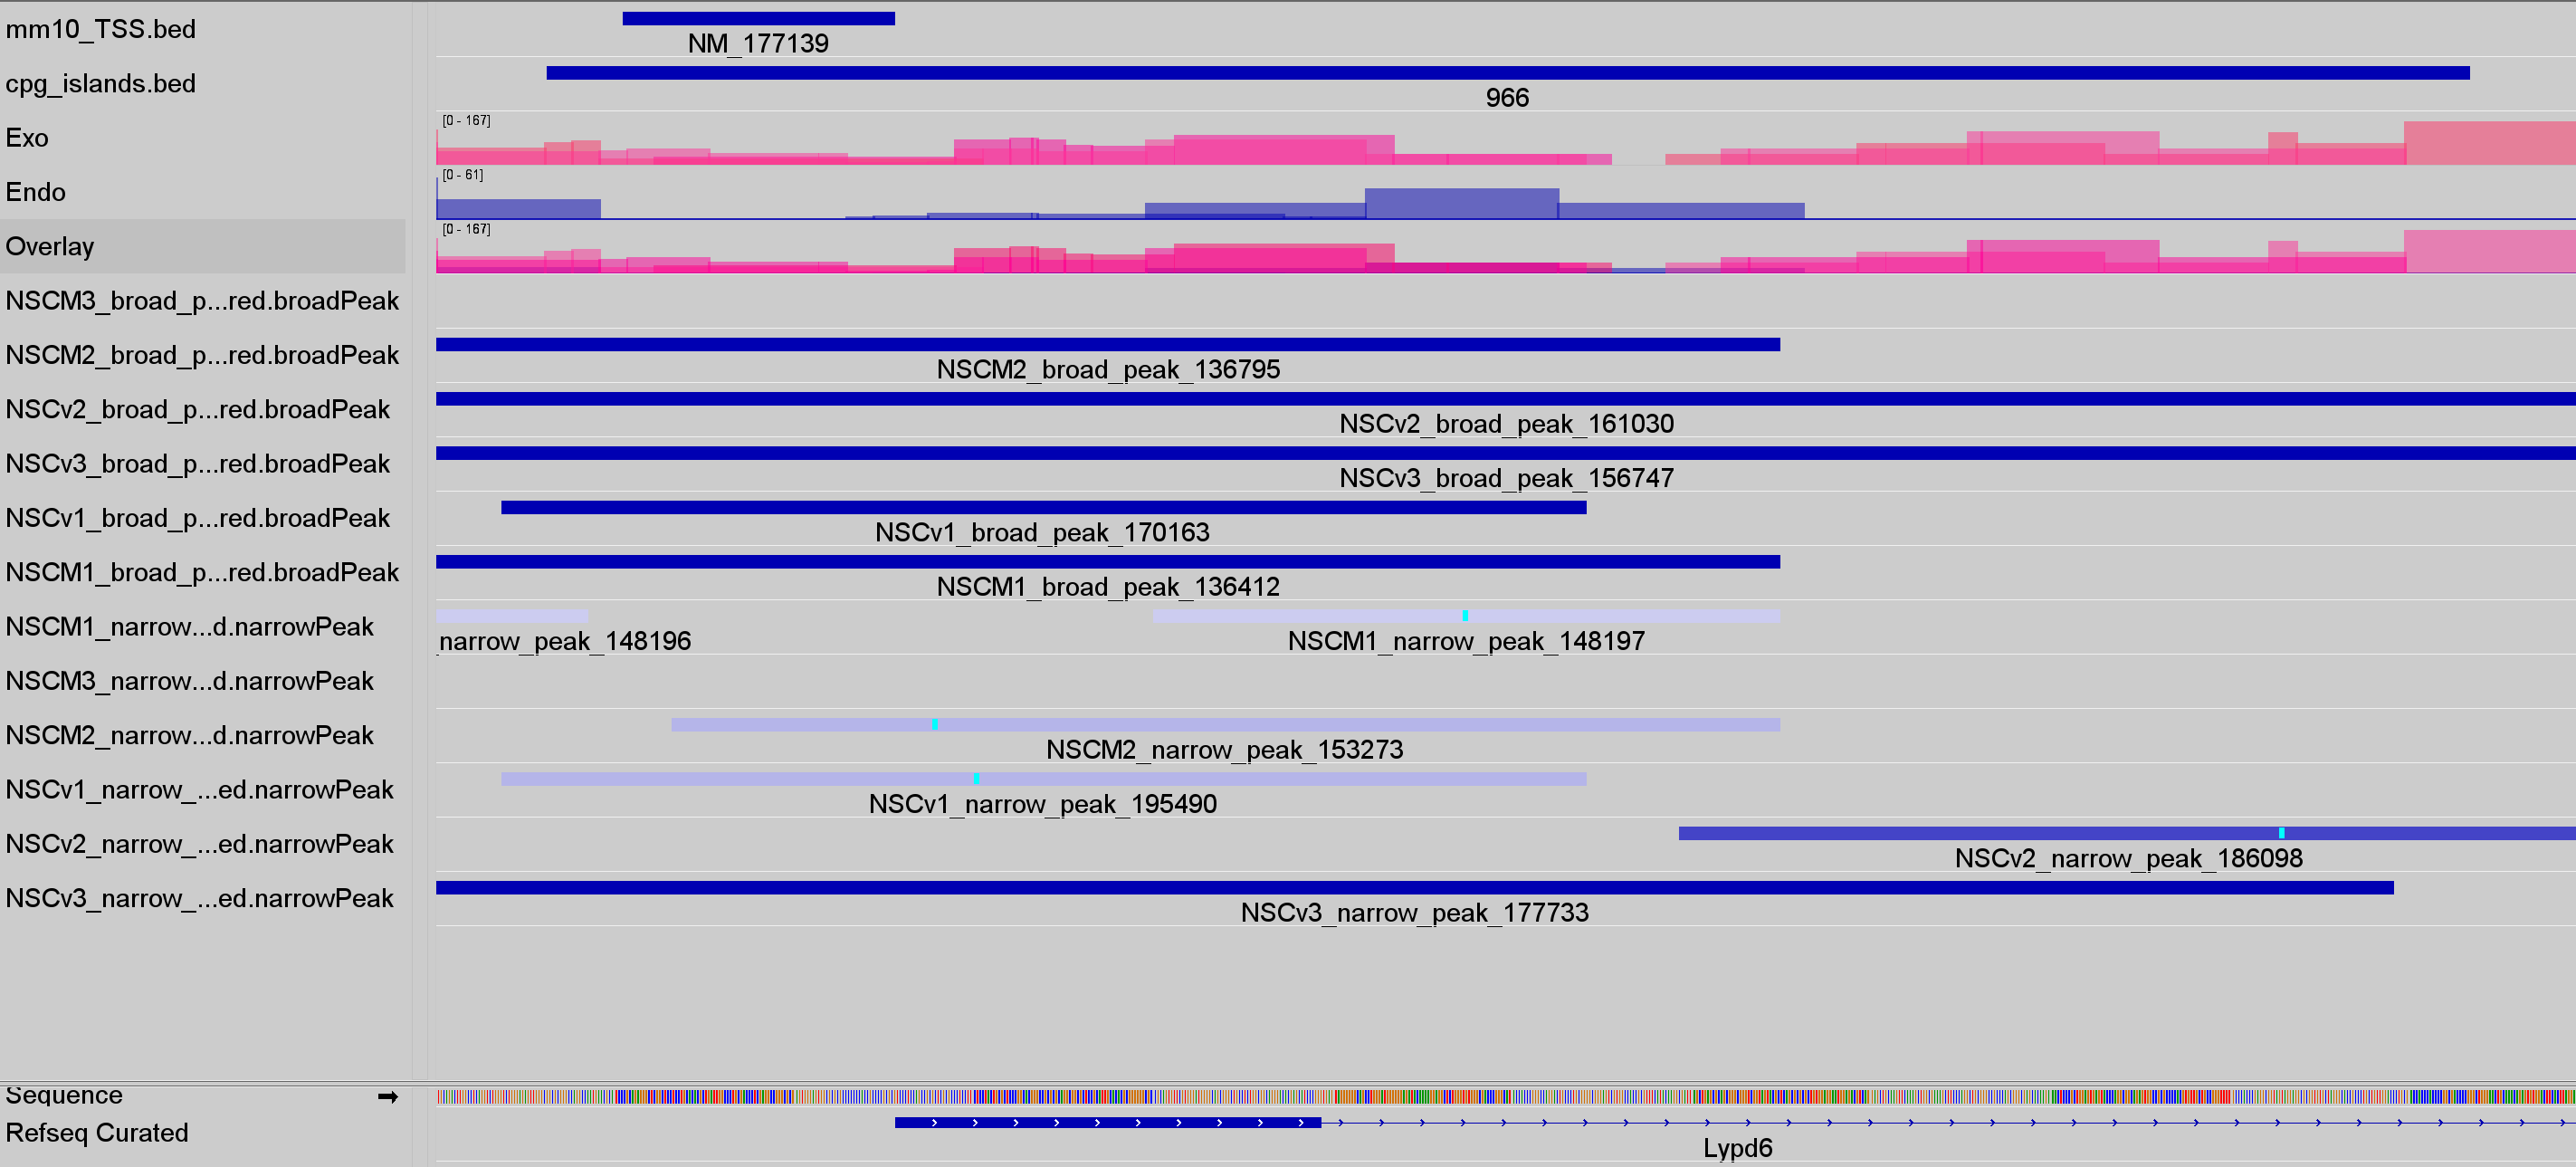

chr9:20,492,516-20,492,906

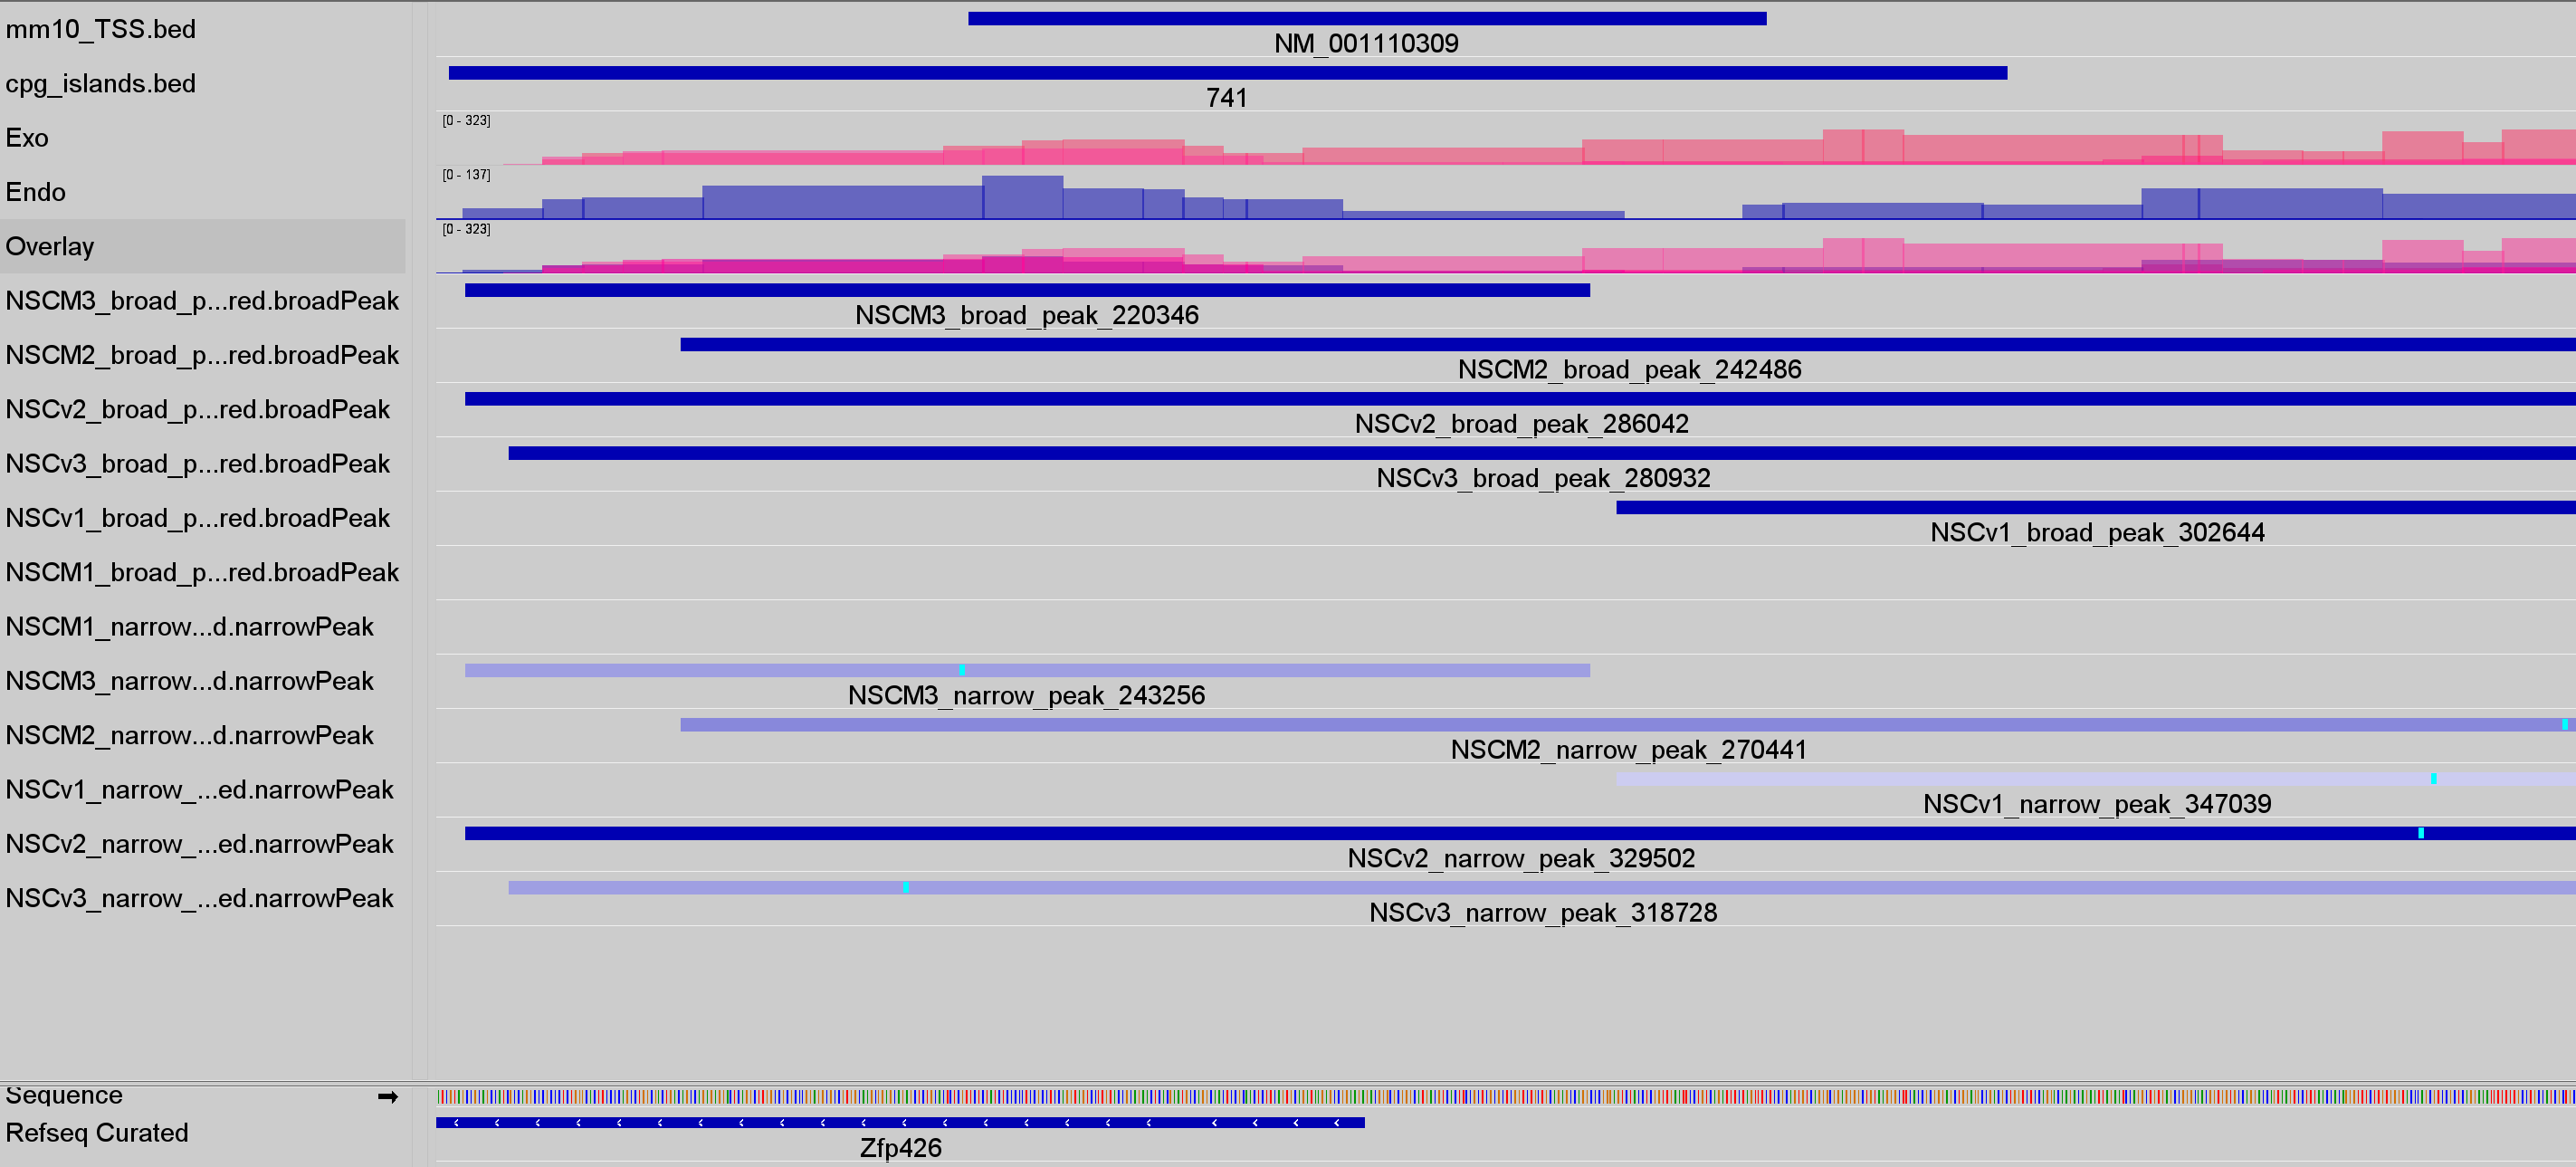

## Regions length distribution

### Region length - defined by the outermost peaks coordinates

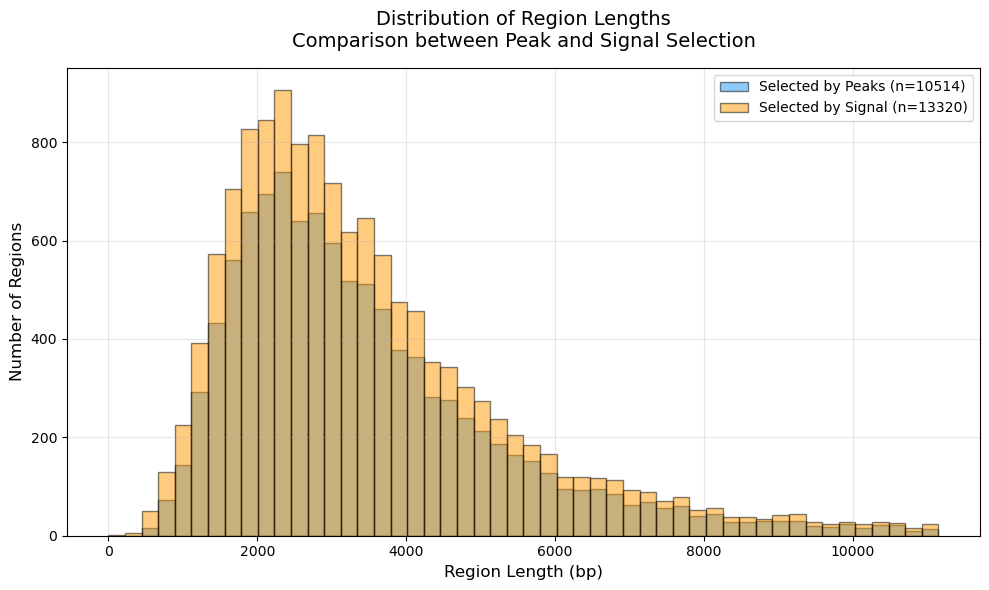

In [20]:
plot_region_length_comparison(both_df_by_peaks, both_df_by_signal, region_length_col='region_length')

In [21]:
both_df_sorted_by_region_length_signal = both_df_by_signal.sort_values(by='region_length', ascending=False)
both_df_sorted_by_region_length_signal.head()

,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,exo_replicate_signals,endo_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,exo_replicates_with_peaks,endo_replicates_with_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,region_start,region_end
9317,chr4,148951660,148952711,28.850291,18.404866,1.567536,0.2,both,exo_only,False,3,2,"25.52438127728439,31.444062274246793,29.582429402940488","16.944114989579063,19.865617735133494",34979,1051,CpG:,1721,3,1,4.57641;11.3859;6.00517,"8.38011,2.70579",148919192,148954171
9316,chr4,148938649,148938905,28.850291,18.404866,1.567536,0.2,both,exo_only,False,3,2,"25.52438127728439,31.444062274246793,29.582429402940488","16.944114989579063,19.865617735133494",34979,256,CpG:,1721,3,0,4.57641;3.65557;5.1156,NaN,148919192,148954171
6704,chr19,59467141,59467557,41.632720,35.771423,1.163854,0.2,both,exo_only,False,3,2,"39.154506400136775,42.351129533752356,43.392525259849556","34.72028307460554,36.82256366579751",23045,416,CpG:,1038,3,1,5.93023;12.3771;6.60721,12.5769,59450888,59473933
6705,chr19,59469037,59469305,41.632720,35.771423,1.163854,0.2,both,exo_only,False,3,2,"39.154506400136775,42.351129533752356,43.392525259849556","34.72028307460554,36.82256366579751",23045,268,CpG:,1038,3,1,5.93023;12.3771;6.60721,8.39349,59450888,59473933
6702,chr19,59451480,59451824,42.992878,38.123355,1.127731,0.2,both,exo_only,False,3,2,"42.84484193996158,41.340740006103786,44.793053429427864","35.64894087932479,40.59776996611675",22693,344,CpG:,1038,3,1,7.05486;11.0538;6.60721,5.54396,59447847,59470540


In [22]:
both_df_sorted_by_region_length_peaks = both_df_by_peaks.sort_values(by='region_length', ascending=False)
both_df_sorted_by_region_length_peaks.head()

,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,exo_replicate_signals,endo_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,exo_replicates_with_peaks,endo_replicates_with_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,region_start,region_end
7780,chr2,167777455,167777726,79.994576,64.541676,1.239425,0.8,both,both,False,3,2,"58.5343156873228,71.8351678906179,109.61424505702277","59.470649875551025,69.61270134309568",21038,271,CpG:,1865,3,2,10.3069;21.2532;8.05397,12.6472;16.3285,167759249,167780287
6703,chr19,59457915,59459984,44.975806,39.751680,1.131419,0.4,both,both,False,3,2,"42.393046196893664,45.20665201607052,47.32772054462123","36.92993188448417,42.57342794903081",19961,2069,CpG:,1038,3,2,7.05486;17.2207;6.60721,15.1877;12.2083,59450579,59470540
9013,chr4,125127466,125128145,52.455594,39.333935,1.333596,0.4,both,both,False,3,2,"38.49139498623199,43.96135217666401,74.91403613866505","41.89086303567177,36.77700727253317",19636,679,CpG:,1539,3,2,7.15699;10.9443;5.36596,11.4221;6.94524,125109408,125129044
12578,chr8,94172329,94172845,92.028852,101.590640,0.905879,0.8,both,both,False,3,2,"81.96502107071389,75.48505183163515,118.63648363144893","121.46416784751983,81.71711134919252",18648,516,CpG:,1303,3,2,11.9205;16.2083;8.77759,23.5626;18.2219,94169326,94187974
12579,chr8,94178896,94179555,94.048859,104.757090,0.897780,0.8,both,both,False,3,2,"85.14249524551293,76.25390881595925,120.75017432776535","127.10324561531024,82.41093480459857",17819,659,CpG:,1303,3,2,11.9205;37.2944;19.6751,25.1789;14.2781,94170155,94187974


In [23]:
print_outlier_groups(both_df_sorted_by_region_length_peaks, "peaks")


First 5 outliers selected by peaks:
chr2:167,777,455-167,777,726                      enrichment: 1.23942515369246
chr19:59,457,915-59,459,984                       enrichment: 1.1314190078686144
chr4:125,127,466-125,128,145                      enrichment: 1.333596402911206
chr8:94,172,329-94,172,845                        enrichment: 0.9058792477513034
chr8:94,178,896-94,179,555                        enrichment: 0.8977803724271668

Middle 5 outliers selected by peaks:
chr13:43,784,970-43,785,437                       enrichment: 0.9314582530226004
chr6:120,916,390-120,916,975                      enrichment: 0.4145429555559637
chr16:91,561,652-91,561,879                       enrichment: 0.6773573387619989
chr2:168,080,520-168,081,559                      enrichment: 1.2253507343782803
chr15:96,459,953-96,461,411                       enrichment: 1.1539256229252128

Last 5 outliers selected by peaks:
chr13:21,530,756-21,531,091                       enrichment: 0.7053765439463069
c

In [24]:
print_outlier_groups(both_df_sorted_by_region_length_signal, "signal")


First 5 outliers selected by signal:
chr4:148,951,660-148,952,711                      enrichment: 1.5675360210075622
chr4:148,938,649-148,938,905                      enrichment: 1.5675360210075622
chr19:59,467,141-59,467,557                       enrichment: 1.163854173960379
chr19:59,469,037-59,469,305                       enrichment: 1.163854173960379
chr19:59,451,480-59,451,824                       enrichment: 1.127730704230584

Middle 5 outliers selected by signal:
chr3:122,983,891-122,985,018                      enrichment: 0.8122799748135175
chr5:147,429,884-147,431,236                      enrichment: 0.5392994636114434
chr13:21,200,463-21,200,674                       enrichment: 0.9044031862882728
chr9:102,505,893-102,506,472                      enrichment: 1.76867203434623
chr11:58,302,795-58,303,044                       enrichment: 1.0236579296225414

Last 5 outliers selected by signal:
chr9:21,685,922-21,686,143                        enrichment: 1.9990641161434697


### IGV: examples

chr7:45,717,703-45,718,318 

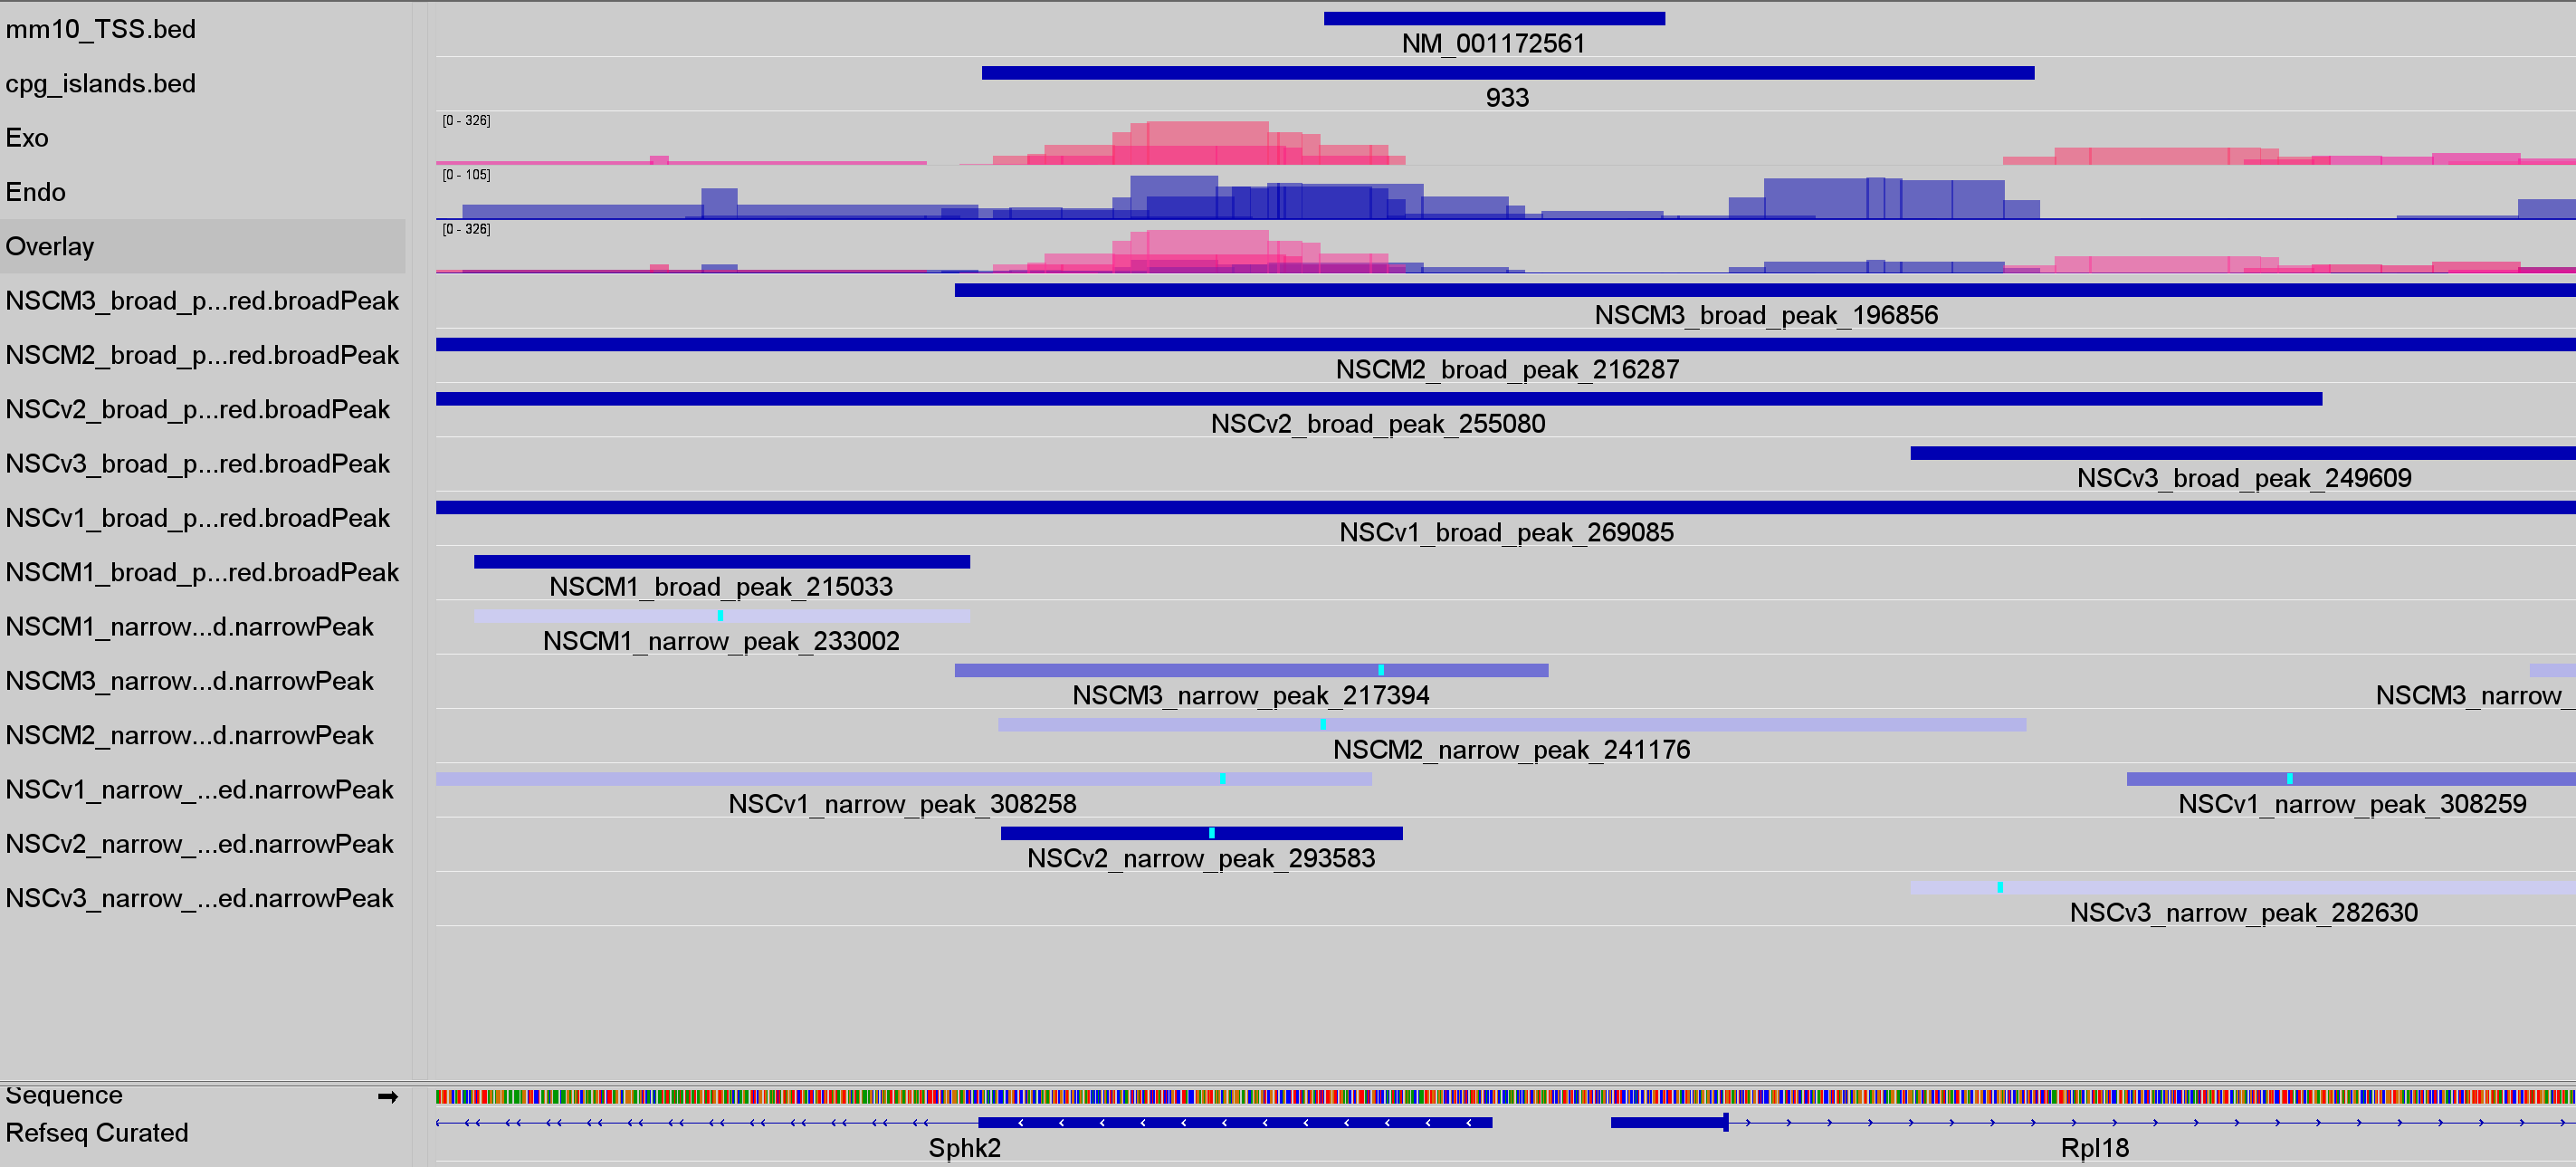

### CpG length - defined by the CpG coordinates

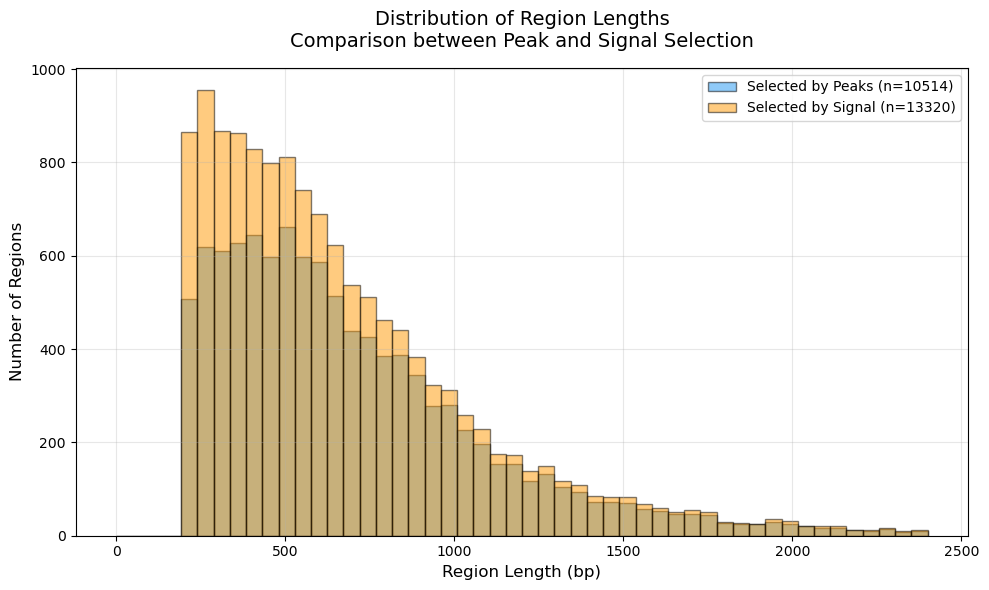

In [25]:
plot_region_length_comparison(both_df_by_peaks, both_df_by_signal, region_length_col='cpg_length')

In [26]:
both_df_sorted_by_cpg_length_peaks = both_df_by_peaks.sort_values(by='cpg_length', ascending=False)
both_df_sorted_by_cpg_length_peaks.head()
print_outlier_groups(both_df_sorted_by_cpg_length_peaks, "peaks")


First 5 outliers selected by peaks:
chr8:92,355,697-92,360,826                        enrichment: 0.9218516276501008
chrX:12,086,982-12,092,060                        enrichment: 1.1787320183881742
chrX:12,076,861-12,081,915                        enrichment: 1.2710026064056446
chr17:34,118,396-34,122,981                       enrichment: 1.1249046188596163
chr8:87,958,428-87,962,795                        enrichment: 0.9274432179626532

Middle 5 outliers selected by peaks:
chr10:70,244,923-70,245,530                       enrichment: 0.6433882246299513
chrX:8,145,265-8,145,872                          enrichment: 0.88448689188158
chr15:94,589,337-94,589,944                       enrichment: 2.015109863081829
chr3:88,531,525-88,532,132                        enrichment: 1.0947731919804824
chr4:124,802,118-124,802,725                      enrichment: 0.901713324159453

Last 5 outliers selected by peaks:
chr11:101,551,776-101,551,977                     enrichment: 1.0933440914695738
ch

In [27]:
both_df_sorted_by_cpg_length_signal = both_df_by_signal.sort_values(by='cpg_length', ascending=False)
both_df_sorted_by_cpg_length_signal.head()
print_outlier_groups(both_df_sorted_by_cpg_length_signal, "signal")


First 5 outliers selected by signal:
chr8:92,355,697-92,360,826                        enrichment: 0.9218516276501008
chr5:33,430,439-33,435,552                        enrichment: 0.7096272221087795
chrX:12,086,982-12,092,060                        enrichment: 1.1787320183881742
chrX:12,076,861-12,081,915                        enrichment: 1.2710026064056446
chr17:34,118,396-34,122,981                       enrichment: 1.1249046188596163

Middle 5 outliers selected by signal:
chr7:30,534,887-30,535,458                        enrichment: 0.9947581521682408
chr2:92,024,060-92,024,631                        enrichment: 2.590948377937264
chr17:35,089,144-35,089,715                       enrichment: 1.1123702802160051
chr17:45,563,846-45,564,417                       enrichment: 0.7452020511108439
chr7:119,793,770-119,794,341                      enrichment: 0.8971048131898982

Last 5 outliers selected by signal:
chr4:105,109,954-105,110,155                      enrichment: 1.1625238019786

### IGV: examples

chr8:92,355,697-92,360,826

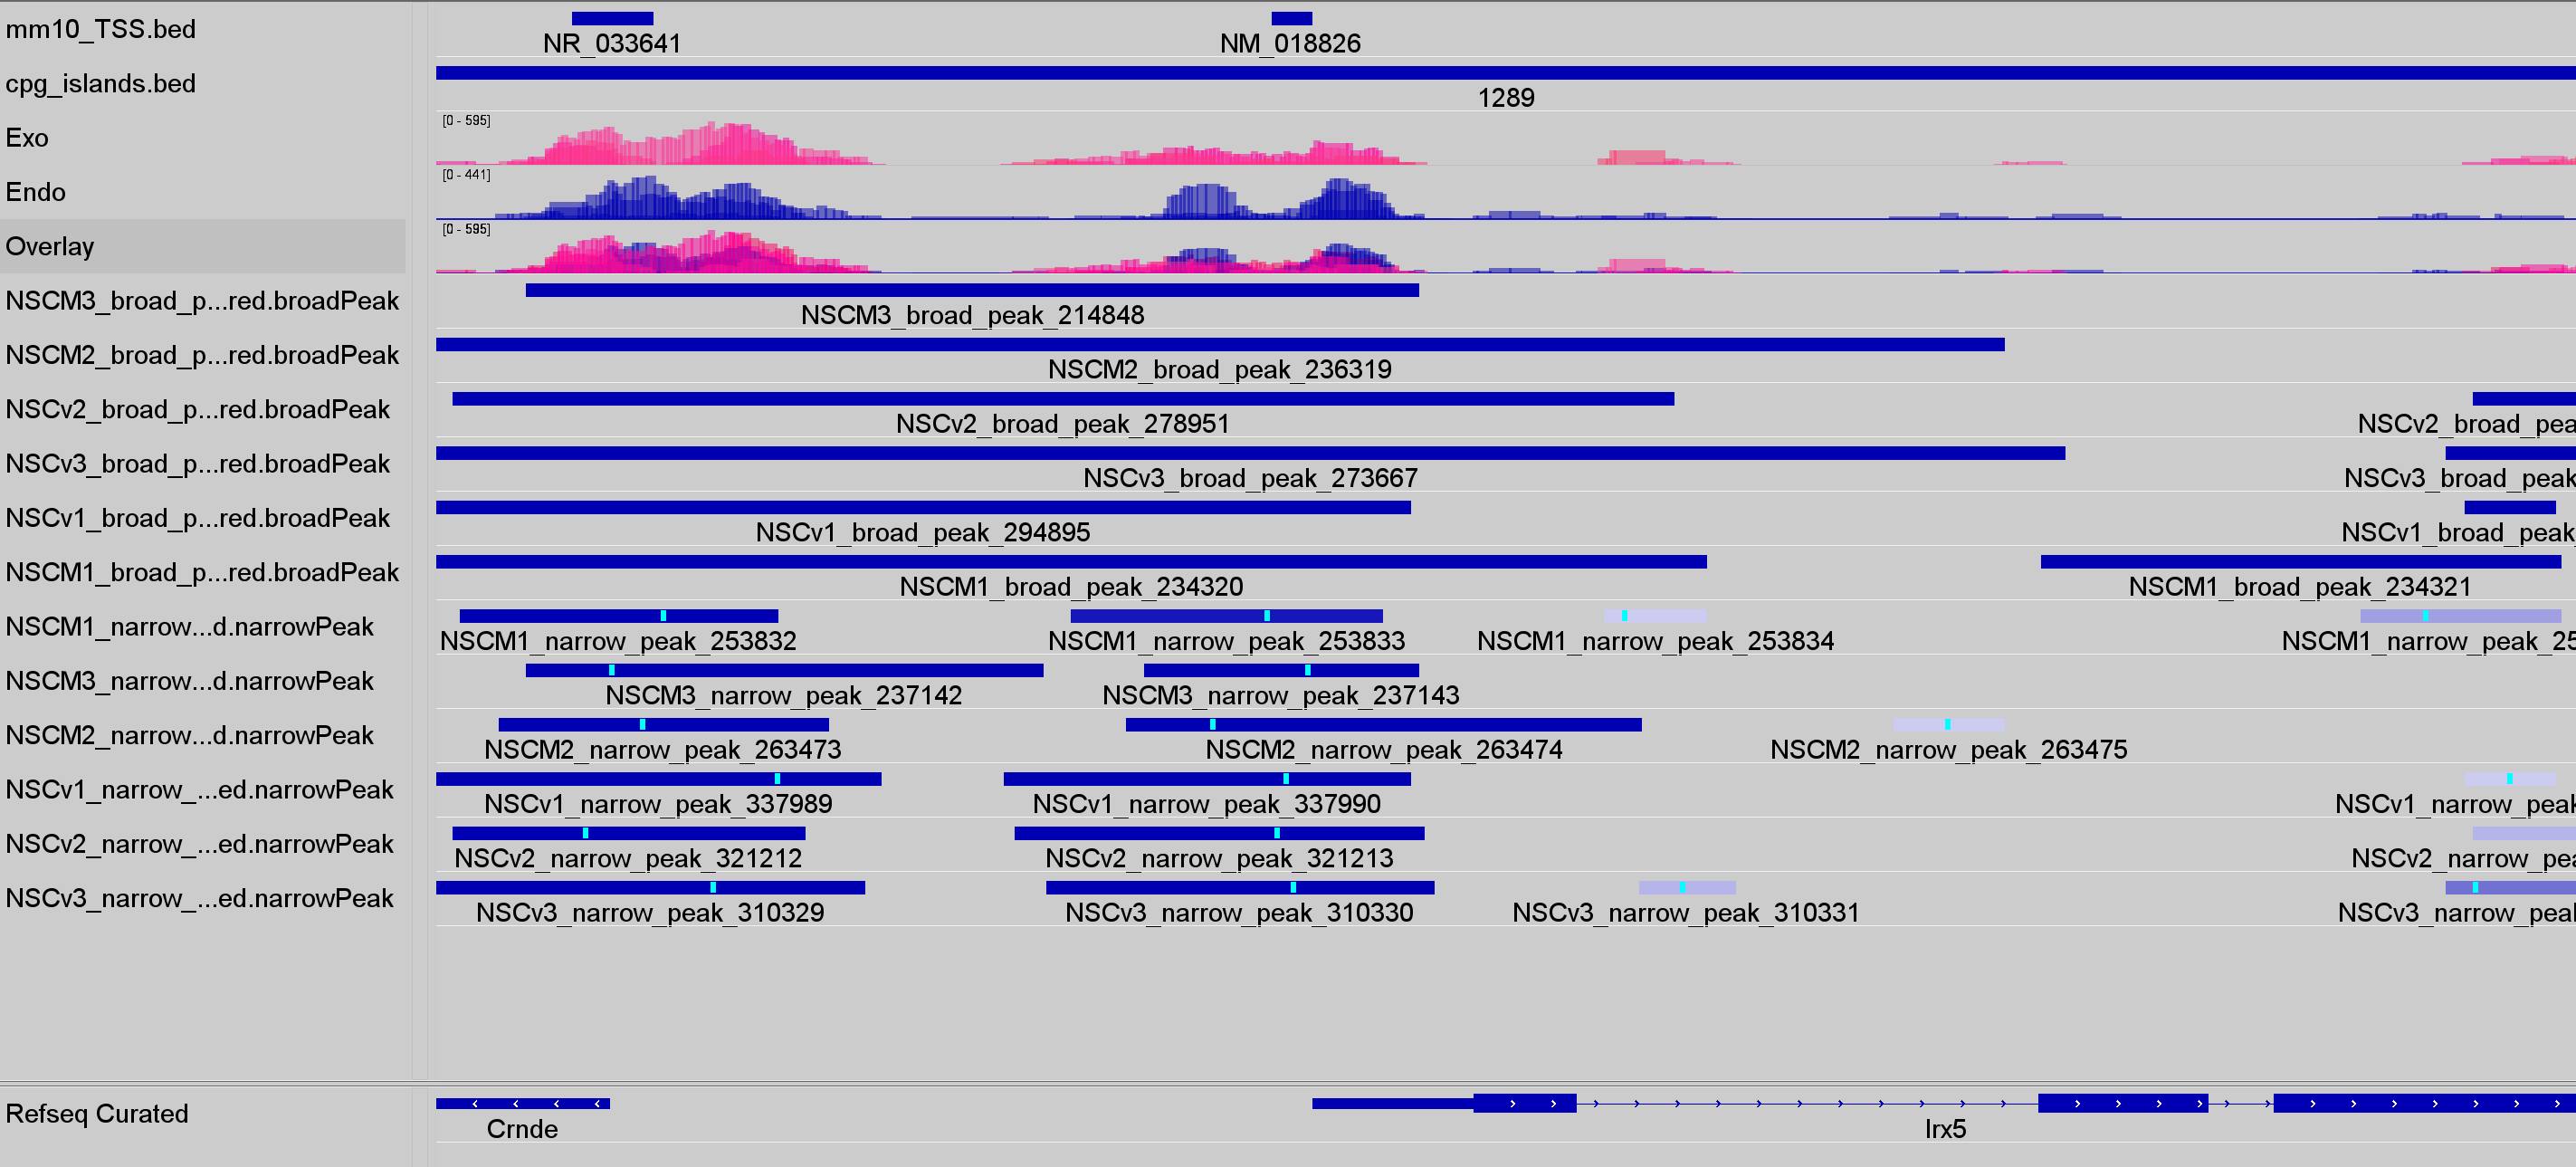

# Exo only

In [28]:
exo_only_df_by_peaks.head()

,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,exo_replicate_signals,endo_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,exo_replicates_with_peaks,endo_replicates_with_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,region_start,region_end
5317,chr17,25133340,25133660,28.683061,0.0,inf,1.0,exo_only,exo_only,False,3,0,"16.65983360463923,24.092502402536798,45.29684780944478","0.0,0.0",1320,320,CpG:,776,3,1,4.25231;19.9521;7.69683,6.86951,25132976,25134296
11316,chr7,30453876,30454191,22.463228,0.0,inf,1.0,exo_only,exo_only,False,3,0,"0.20107357842581614,9.70290263971888,57.48570764871468","0.0,0.0",532,315,CpG:,817,2,0,3.4828;9.98737,NaN,30453802,30454334
6841,chr2,25616103,25616625,15.781405,0.0,inf,1.0,exo_only,exo_only,False,3,0,"15.365788655577084,23.849669168311085,8.128757399770869","0.0,0.0",1337,522,CpG:,780,2,0,3.56151;3.31347,NaN,25615492,25616829
9747,chr5,74620010,74620304,18.958589,0.0,inf,1.0,exo_only,exo_only,False,3,0,"19.582796868494743,32.64136631362104,4.651602477843059","0.0,0.0",414,294,CpG:,1154,2,0,3.13989;2.54413,NaN,74619862,74620276
9841,chr5,101647591,101648431,14.786679,0.0,inf,1.0,exo_only,exo_only,False,3,0,"14.723985554478693,12.841777057512433,16.794275495177466","0.0,0.0",1128,840,CpG:,1360,3,0,3.46783;3.15744;3.79923,NaN,101648101,101649229


In [29]:
# Generate summary statistics for numeric columns, ignoring inf values
# Replace inf values with NaN before calculating statistics
numeric_cols = ['exo_signal', 'endo_signal', 'enrichment', 'region_length', 'cpg_length', 'pvalue']

stats_df = exo_only_df_by_peaks[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("Exo only - by peaks, size:", len(exo_only_df_by_peaks))
stats_df

Exo only - by peaks, size: 3265


,exo_signal,endo_signal,enrichment,region_length,cpg_length,pvalue
count,3265.000000,3265.000000,3187.000000,3265.000000,3265.000000,3265.00000
mean,30.772583,21.616837,3.503219,3315.698622,544.964165,0.62291
std,33.981918,25.748196,16.271403,2550.704357,377.314216,0.31048
min,4.607972,0.000000,0.209705,220.000000,201.000000,0.20000
25%,17.612830,9.931378,1.022644,1699.000000,287.000000,0.40000
50%,23.705803,17.054474,1.418251,2659.000000,432.000000,0.80000
75%,34.414955,26.481797,2.166521,4096.000000,667.000000,1.00000
max,1072.926509,842.532182,342.111587,34979.000000,5113.000000,1.00000


In [30]:
stats_df = exo_only_df_by_signal[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("Exo only - by signal, size:", len(exo_only_df_by_signal))
stats_df

Exo only - by signal, size: 671


,exo_signal,endo_signal,enrichment,region_length,cpg_length,pvalue
count,671.000000,671.000000,593.000000,671.000000,671.000000,671.000000
mean,23.718993,9.450797,11.094790,1775.694486,524.058122,0.727521
std,15.497368,9.633818,36.385589,1012.682013,382.083727,0.247504
min,4.037695,0.000000,0.362548,241.000000,201.000000,0.500000
25%,15.327254,2.107965,1.415281,1021.500000,280.000000,0.500000
50%,20.149874,7.433562,2.421685,1621.000000,396.000000,0.500000
75%,27.824550,13.349830,4.697872,2298.000000,618.000000,1.000000
max,211.252610,68.016148,342.111587,8729.000000,3229.000000,1.000000


In [31]:
print_across_distribution(exo_only_df_by_peaks, selection_type="peaks")


First 5 elements selected by peaks:
chr17:25,133,340-25,133,660                       enrichment: inf
chr7:30,453,876-30,454,191                        enrichment: inf
chr2:25,616,103-25,616,625                        enrichment: inf
chr5:74,620,010-74,620,304                        enrichment: inf
chr5:101,647,591-101,648,431                      enrichment: inf

Middle 5 elements selected by peaks:
chr2:105,682,175-105,682,387                      enrichment: 1.4438528631276175
chr11:100,713,863-100,714,278                     enrichment: 1.4429918803917574
chr12:110,189,306-110,189,683                     enrichment: 1.4428938536599545
chr7:43,675,143-43,675,617                        enrichment: 1.4428670031097637
chrX:74,368,245-74,368,698                        enrichment: 1.4427113699919547

Last 5 elements selected by peaks:
chr7:140,047,766-140,049,321                      enrichment: 0.3071163489828074
chr16:13,868,019-13,868,377                       enrichment: 0.267663750

In [32]:
print_across_distribution(exo_only_df_by_signal, selection_type="signal")


First 5 elements selected by signal:
chr17:25,133,340-25,133,660                       enrichment: inf
chr7:30,453,876-30,454,191                        enrichment: inf
chr2:25,616,103-25,616,625                        enrichment: inf
chr5:74,620,010-74,620,304                        enrichment: inf
chr5:101,647,591-101,648,431                      enrichment: inf

Middle 5 elements selected by signal:
chr12:28,649,525-28,649,834                       enrichment: 2.8558106571127246
chr16:31,663,525-31,663,895                       enrichment: 2.8485972809136806
chr7:67,803,660-67,803,869                        enrichment: 2.7920814849875435
chr17:87,796,961-87,798,830                       enrichment: 2.7881665346095343
chr17:35,156,367-35,156,609                       enrichment: 2.7690303192741483

Last 5 elements selected by signal:
chr2:157,020,678-157,021,147                      enrichment: 0.4552849024120562
chr10:121,351,001-121,351,542                     enrichment: 0.428710

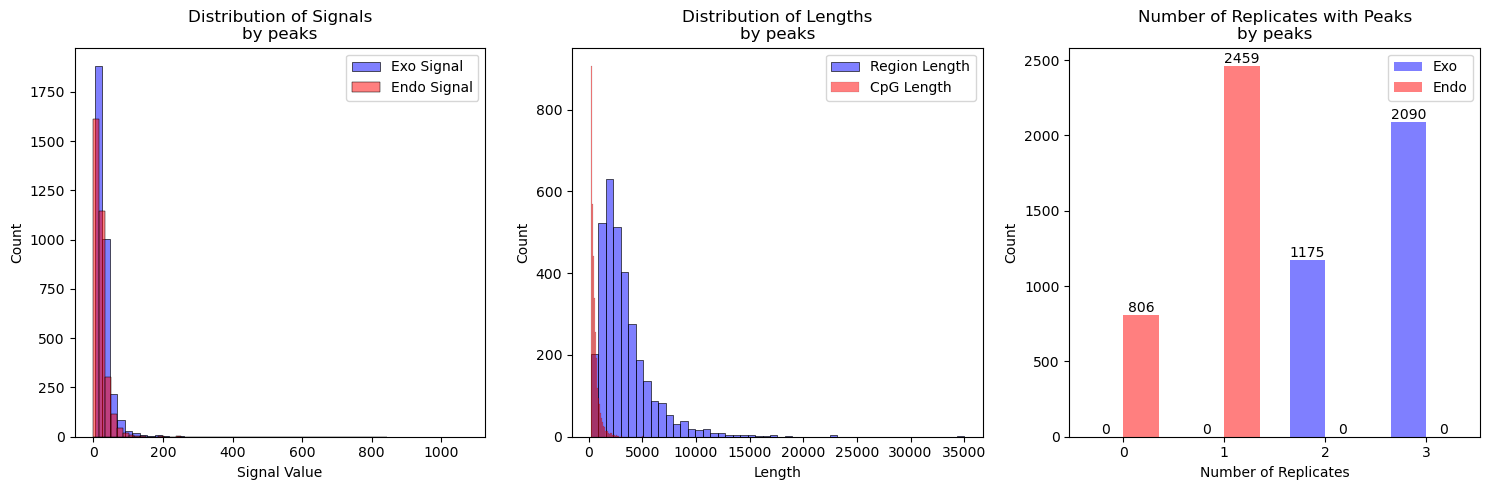

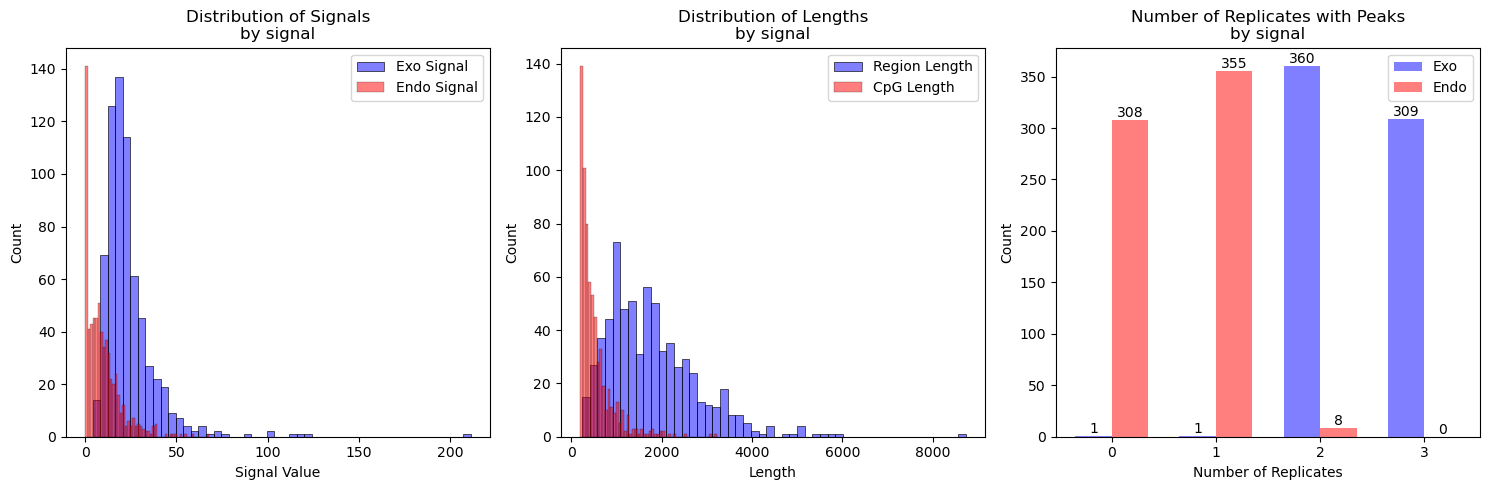

In [33]:
plot_exo_only_distributions(exo_only_df_by_peaks, title="by peaks")
plot_exo_only_distributions(exo_only_df_by_signal, title="by signal")

# Endo only

In [34]:
endo_only_df_by_peaks.head()

,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,exo_replicate_signals,endo_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,exo_replicates_with_peaks,endo_replicates_with_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,region_start,region_end
1174,chr10,80656107,80656330,119.874787,42.079060,2.848799,0.2,both,endo_only,False,3,2,"116.9109691920179,123.06219934991066,119.65119267078155","27.664973345411585,56.49314646294776",1175,223,CpG:,1200,0,2,NaN,7.72401;9.99211,80655826,80657001
1199,chr10,81079911,81080224,19.223128,7.895685,2.434637,0.2,both,endo_only,False,3,2,"16.280235158840842,26.86238428818028,14.526763471237363","2.0465058570742296,13.74486321148611",6128,313,CpG:,1203,1,2,3.90967,5.71791;5.26922,81077198,81083326
12016,chr7,141950083,141950681,48.875240,22.637437,2.159045,0.2,both,endo_only,False,3,2,"37.84515054676755,41.30497372355345,67.47559475969406","24.313954231155364,20.960918901654907",3374,598,CpG:,1667,1,2,14.2908,8.85164;8.25619,141948798,141952172
11770,chr7,110768534,110768973,19.822191,10.869871,1.823590,0.8,both,endo_only,False,3,2,"14.487106360370174,16.1430323598872,28.8364348786905","2.464167661848445,19.275574451076878",3519,439,CpG:,1430,1,2,6.42278,2.94576;5.12814,110766251,110769770
13462,chr9,107399590,107400052,15.399942,8.906891,1.728992,0.4,both,endo_only,False,3,2,"17.045509913579746,17.92244687061212,11.231869249471798","3.9345228692297445,13.879259779933898",5293,462,CpG:,1404,1,2,3.36498,4.7952;7.09929,107395212,107400505


In [35]:
# Generate summary statistics for numeric columns, ignoring inf values
# Replace inf values with NaN before calculating statistics
numeric_cols = ['exo_signal', 'endo_signal', 'enrichment', 'region_length', 'cpg_length', 'pvalue']

stats_df = endo_only_df_by_peaks[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("endo only - by peaks, size:", len(endo_only_df_by_peaks))
stats_df

endo only - by peaks, size: 217


,exo_signal,endo_signal,enrichment,region_length,cpg_length,pvalue
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,20.990665,30.697675,0.671530,2816.156682,617.460829,0.538863
std,33.896146,27.361961,0.437540,1980.539464,584.693058,0.305505
min,0.000000,5.801383,0.000000,304.000000,201.000000,0.200000
25%,8.714393,16.990314,0.351992,1543.000000,289.000000,0.200000
50%,13.593033,25.197660,0.584304,2402.000000,436.000000,0.400000
75%,19.822191,35.195293,0.916136,3594.000000,685.000000,0.800000
max,365.999599,274.254265,2.848799,15065.000000,3882.000000,1.000000


In [36]:
stats_df = endo_only_df_by_signal[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("endo only - by signal, size:", len(endo_only_df_by_signal))
stats_df

endo only - by signal, size: 5


,exo_signal,endo_signal,enrichment,region_length,cpg_length,pvalue
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1.814058,36.707435,0.060610,778.200000,660.800000,0.800000
std,1.268258,11.471532,0.047021,163.951822,440.335895,0.182574
min,0.000000,25.194977,0.000000,624.000000,211.000000,0.666667
25%,1.066178,30.229173,0.026419,624.000000,470.000000,0.666667
50%,2.198050,33.021765,0.066564,750.000000,506.000000,0.666667
75%,2.723297,40.356663,0.101980,911.000000,745.000000,1.000000
max,3.082766,54.734597,0.108089,982.000000,1372.000000,1.000000


In [37]:
print_across_distribution(endo_only_df_by_peaks, selection_type="peaks")


First 5 elements selected by peaks:
chr10:80,656,107-80,656,330                       enrichment: 2.8487990783034656
chr10:81,079,911-81,080,224                       enrichment: 2.4346372446821696
chr7:141,950,083-141,950,681                      enrichment: 2.159044798791596
chr7:110,768,534-110,768,973                      enrichment: 1.8235902796532293
chr9:107,399,590-107,400,052                      enrichment: 1.7289917941088442

Middle 5 elements selected by peaks:
chr1:89,941,589-89,942,209                        enrichment: 0.5970234426499654
chr18:84,085,367-84,086,150                       enrichment: 0.5943589828568007
chr2:74,727,333-74,727,642                        enrichment: 0.5843036896537843
chr17:15,705,695-15,705,900                       enrichment: 0.5649211836479711
chr11:78,924,996-78,925,388                       enrichment: 0.5549309936591518

Last 5 elements selected by peaks:
chr1:184,718,485-184,718,804                      enrichment: 0.0766343979558763

In [38]:
print_across_distribution(endo_only_df_by_signal, selection_type="signal")


First 5 elements selected by signal:
chr1:133,163,776-133,164,521                      enrichment: 0.1080888760379759
chr6:52,252,739-52,254,111                        enrichment: 0.1019798495384113
chr3:66,973,459-66,973,929                        enrichment: 0.0665636876950031
chr6:52,240,323-52,240,829                        enrichment: 0.0264188831642972
chr12:24,493,515-24,493,726                       enrichment: 0.0

Last 5 elements selected by signal:
chr1:133,163,776-133,164,521                      enrichment: 0.1080888760379759
chr6:52,252,739-52,254,111                        enrichment: 0.1019798495384113
chr3:66,973,459-66,973,929                        enrichment: 0.0665636876950031
chr6:52,240,323-52,240,829                        enrichment: 0.0264188831642972
chr12:24,493,515-24,493,726                       enrichment: 0.0


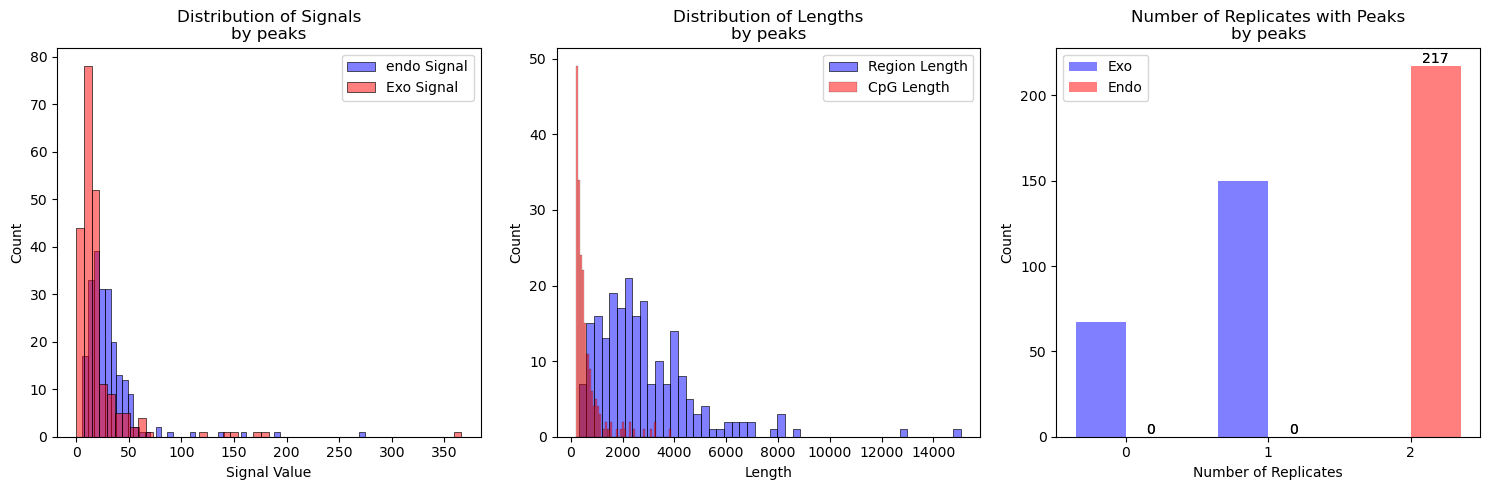

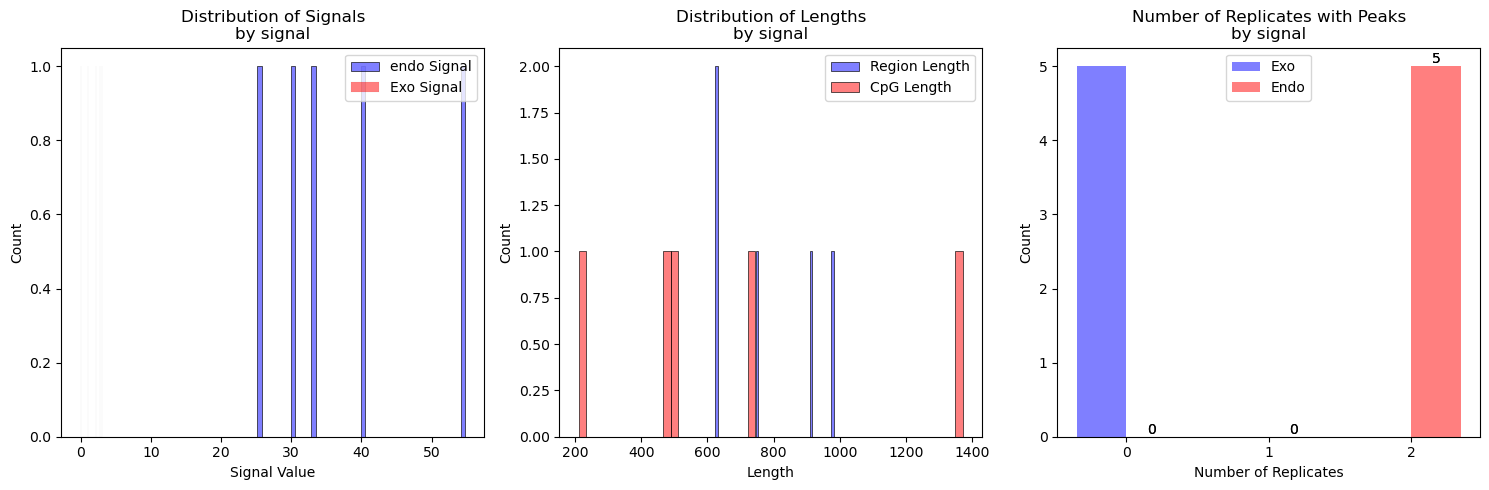

In [39]:
plot_endo_only_distributions(endo_only_df_by_peaks, title="by peaks")
plot_endo_only_distributions(endo_only_df_by_signal, title="by signal")

# Create output files

In [40]:
both_df_by_signal_1 = both_df_by_signal[(both_df_by_signal['enrichment'] > 1) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
both_df_by_signal_1_5 = both_df_by_signal[(both_df_by_signal['enrichment'] > 1.5) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()    
both_df_by_signal_2 = both_df_by_signal[(both_df_by_signal['enrichment'] > 2) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()


both_df_by_peaks_1 = both_df_by_peaks[(both_df_by_peaks['enrichment'] > 1) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()
both_df_by_peaks_1_5 = both_df_by_peaks[(both_df_by_peaks['enrichment'] > 1.5) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()    
both_df_by_peaks_2 = both_df_by_peaks[(both_df_by_peaks['enrichment'] > 2) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()

In [41]:
print("both_df_by_signal_1.shape:", both_df_by_signal_1.shape)
print("both_df_by_signal_1_5.shape:", both_df_by_signal_1_5.shape)
print("both_df_by_signal_2.shape:", both_df_by_signal_2.shape)
print()
print("both_df_by_peaks_1.shape:", both_df_by_peaks_1.shape)
print("both_df_by_peaks_1_5.shape:", both_df_by_peaks_1_5.shape)
print("both_df_by_peaks_2.shape:", both_df_by_peaks_2.shape)

both_df_by_signal_1.shape: (7728, 24)
both_df_by_signal_1_5.shape: (2600, 24)
both_df_by_signal_2.shape: (792, 24)

both_df_by_peaks_1.shape: (5938, 24)
both_df_by_peaks_1_5.shape: (1732, 24)
both_df_by_peaks_2.shape: (398, 24)


In [42]:
both_df_by_signal_1.to_csv(f'{OUTPUT_LISTS_PATH}/both_df_by_signal_1.csv', index=False)
both_df_by_signal_1_5.to_csv(f'{OUTPUT_LISTS_PATH}/both_df_by_signal_1_5.csv', index=False)
both_df_by_signal_2.to_csv(f'{OUTPUT_LISTS_PATH}/both_df_by_signal_2.csv', index=False)
both_df_by_peaks_1.to_csv(f'{OUTPUT_LISTS_PATH}/both_df_by_peaks_1.csv', index=False)
both_df_by_peaks_1_5.to_csv(f'{OUTPUT_LISTS_PATH}/both_df_by_peaks_1_5.csv', index=False)
both_df_by_peaks_2.to_csv(f'{OUTPUT_LISTS_PATH}/both_df_by_peaks_2.csv', index=False)
exo_only_df_by_signal.to_csv(f'{OUTPUT_LISTS_PATH}/exo_only_df_by_signal.csv', index=False)
endo_only_df_by_signal.to_csv(f'{OUTPUT_LISTS_PATH}/endo_only_df_by_signal.csv', index=False)
exo_only_df_by_peaks.to_csv(f'{OUTPUT_LISTS_PATH}/exo_only_df_by_peaks.csv', index=False)
endo_only_df_by_peaks.to_csv(f'{OUTPUT_LISTS_PATH}/endo_only_df_by_peaks.csv', index=False)